In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/data_sets/twitter_validation.csv',
names=['id','source','target','text'])
df

,id,source,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.drop(['id'],axis=1,inplace=True)
df.drop(['source'],axis=1,inplace=True)
df

,target,text
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
...,...,...
995,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


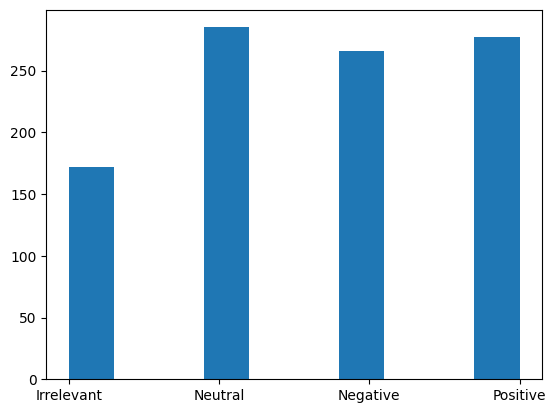

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['target'])
plt.show()


In [ ]:
df1=df.loc[df['target'] != 'Irrelevant']
df1

,target,text
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
5,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
993,Negative,Please explain how this is possible! How can t...
994,Positive,Good on Sony. As much as I want to see the new...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df1.reset_index(drop=True,inplace=True)
df1

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so it’s time to drink wine n play...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df1['target']=df1['target'].map({"Neutral":0,"Negative":-1,"Positive":1})
df1

<ipython-input-175-2c844cbffecf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['target']=df1['target'].map({"Neutral":0,"Negative":-1,"Positive":1})


,target,text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so it’s time to drink wine n play...
826,1,Bought a fraction of Microsoft today. Small wins.


In [ ]:
text=df1.text
df

,target,text
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
...,...,...
995,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
text=text.str.replace('[^a-zA-Z0-9]+'," ")
text


<ipython-input-177-eb9a88d87cf5>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  text=text.str.replace('[^a-zA-Z0-9]+'," ")


0      BBC News Amazon boss Jeff Bezos rejects claims...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi EAHelp I ve had Madeleine McCann in my cell...
                             ...                        
823    Please explain how this is possible How can th...
824    Good on Sony As much as I want to see the new ...
825    Today sucked so it s time to drink wine n play...
826     Bought a fraction of Microsoft today Small wins 
827    Johnson Johnson to stop selling talc baby powd...
Name: text, Length: 828, dtype: object

In [ ]:
from nltk import TweetTokenizer
from nltk.stem import SnowballStemmer
ss=SnowballStemmer('english')
tk=TweetTokenizer()
text=text.apply(lambda line:[ss.stem(token.lower()) for token in tk.tokenize(line)]).apply(lambda token:" ".join(token))
text

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi do i pay for word when it functi...
2      csgo matchmak is so full of closet hack it s a...
3      now the presid is slap american in the face th...
4      hi eahelp i ve had madelein mccann in my cella...
                             ...                        
823    pleas explain how this is possibl how can they...
824    good on soni as much as i want to see the new ...
825    today suck so it s time to drink wine n play b...
826       bought a fraction of microsoft today small win
827    johnson johnson to stop sell talc babi powder ...
Name: text, Length: 828, dtype: object

In [ ]:
import nltk
from nltk.stem.snowball import stopwords
nltk.download('stopwords')
sw=stopwords.words('english')
sw


In [ ]:
text=text.apply(lambda line:[ss.stem(token.lower()) for token in tk.tokenize(line) if token not in sw ]).apply(lambda token:" ".join(token))
text

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      hi eahelp madelein mccann cellar past 13 year ...
                             ...                        
823    plea explain possibl let compani overcharg sca...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine n play borderland s...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder u c...
Name: text, Length: 828, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(text)
print(X)

  (0, 739)	0.2456282916977699
  (0, 526)	0.2456282916977699
  (0, 3597)	0.19717097284763976
  (0, 883)	0.11802111433875656
  (0, 1059)	0.2456282916977699
  (0, 1188)	0.22139963227270484
  (0, 2089)	0.12503547156807654
  (0, 347)	0.2135997461023189
  (0, 912)	0.16343698819954885
  (0, 857)	0.2018385048310212
  (0, 2876)	0.2456282916977699
  (0, 612)	0.2456282916977699
  (0, 1917)	0.23145543449136263
  (0, 679)	0.2135997461023189
  (0, 417)	0.14270670271218175
  (0, 2389)	0.365996231282465
  (0, 581)	0.46291086898272527
  (1, 847)	0.4055823664694651
  (1, 3012)	0.4055823664694651
  (1, 2669)	0.3821800909185634
  (1, 1473)	0.4055823664694651
  (1, 3818)	0.36557591217188057
  (1, 2571)	0.3126902562590763
  (1, 3776)	0.26216072802580975
  (1, 2251)	0.24555654927912696
  :	:
  (825, 677)	0.22981061112100945
  (825, 1052)	0.2315686698425631
  (825, 3500)	0.21750175079084832
  (825, 3350)	0.2904718522758868
  (825, 2637)	0.17148706662740873
  (826, 1448)	0.5079831062080814
  (826, 3193)	0.4786

In [ ]:
X.shape

(828, 3927)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [ ]:
y=df1.iloc[:,0]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(X_test)
y_pred

array([ 0, -1,  0,  1, -1, -1, -1,  0,  1, -1,  0, -1,  0,  0, -1,  0,  0,
       -1, -1, -1,  1,  1, -1,  1,  1,  0,  0,  1, -1, -1,  0, -1,  0,  0,
       -1, -1, -1, -1, -1,  1,  0, -1,  1, -1, -1,  1, -1,  0, -1,  0,  0,
       -1, -1, -1,  0, -1,  0,  1, -1, -1,  0,  0, -1,  0, -1,  0, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  0, -1, -1,  1,
       -1, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1,  0,  0, -1, -1,  1,  0, -1,  1, -1,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1,  0, -1, -1,  1, -1, -1, -1,  0,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  0,
        0,  1,  1, -1, -1,  1, -1,  0, -1, -1, -1, -1,  1, -1, -1,  0, -1,
       -1, -1,  0, -1,  0, -1,  1, -1, -1, -1, -1, -1,  0, -1,  1, -1, -1,
       -1, -1, -1,  0,  0, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1,  0,  0,
       -1,  1, -1,  0,  0,  0, -1, -1, -1,  0,  1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1,  1

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100)

45.78313253012048


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

          -1       0.38      0.80      0.51        74
           0       0.58      0.38      0.46        91
           1       0.61      0.24      0.34        84

    accuracy                           0.46       249
   macro avg       0.52      0.47      0.44       249
weighted avg       0.53      0.46      0.44       249



In [ ]:
nw=vectorizer.transform(['bought a fraction of microsoft today'])
nw=nw.toarray()

In [ ]:
y=knn.predict(nw)
if y==0:
  print("neutral")
elif y==-1:
    print("negative")
else:
  print("positive")


negative


In [ ]:
sv=SVC()
sv.fit(X_train,y_train)

SVC()

In [ ]:
y_pred=sv.predict(X_test)
y_pred

array([ 1, -1,  0,  1, -1, -1,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,
       -1, -1,  0,  1,  0,  1,  1, -1,  0,  0,  1, -1,  0,  1,  0,  0, -1,
       -1,  0, -1, -1,  0,  1,  0, -1,  1, -1, -1,  1,  0,  0, -1,  0,  0,
        0, -1, -1,  0, -1,  1,  1, -1,  0, -1,  0,  0, -1, -1,  1, -1,  1,
        1,  0,  1,  1,  0, -1,  0,  0,  1, -1, -1,  1,  0,  0,  1, -1,  1,
        0,  0,  0, -1,  0,  1,  0,  1, -1,  0,  1, -1,  1,  1,  1, -1, -1,
       -1, -1,  0,  0, -1,  0,  1,  0, -1,  1, -1,  0, -1, -1,  0,  0, -1,
       -1, -1,  1,  0,  1,  1, -1,  0,  0,  1,  0, -1, -1, -1,  1,  0, -1,
        1, -1, -1,  0, -1,  1,  0,  1,  0, -1,  1, -1,  0,  1,  0, -1,  0,
       -1,  1,  0,  0, -1,  1, -1,  0,  1, -1, -1, -1,  1,  1,  1,  0, -1,
        0, -1,  0, -1,  0,  1,  1,  0, -1, -1, -1,  0,  0,  0,  1,  1, -1,
       -1, -1, -1,  0,  0,  1,  0, -1,  0, -1,  0,  1,  0, -1, -1,  0,  0,
        1,  1, -1,  0,  0,  0, -1, -1, -1,  0,  1, -1, -1,  0,  1,  0, -1,
        0,  0,  1,  1,  1

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100)

63.45381526104418


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

          -1       0.60      0.72      0.65        74
           0       0.64      0.65      0.64        91
           1       0.67      0.55      0.60        84

    accuracy                           0.63       249
   macro avg       0.64      0.64      0.63       249
weighted avg       0.64      0.63      0.63       249



In [ ]:
y=sv.predict(nw)
if y==0:
  print("neutral")
elif y==-1:
    print("negative")
else:
  print("positive")


positive


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
y_pred=rf.predict(X_test)
y_pred

array([ 0, -1,  0,  1, -1, -1, -1,  0,  1, -1,  0,  0, -1,  0,  1,  0,  1,
       -1, -1, -1,  1,  0,  0, -1, -1,  0,  0,  1,  1,  0, -1,  0,  0, -1,
       -1,  0, -1, -1,  0,  1,  1,  1,  0, -1,  0,  1,  0,  0, -1,  0,  0,
        0, -1, -1, -1, -1,  1,  1, -1,  0, -1,  0,  0, -1, -1, -1, -1,  1,
       -1,  0,  1,  1,  0, -1,  0, -1,  1, -1, -1, -1,  0,  0, -1, -1, -1,
        0, -1,  0, -1,  0,  0,  0,  1, -1,  0,  1, -1,  0,  0,  0, -1, -1,
       -1, -1,  0,  0, -1,  0, -1,  0,  0,  1, -1,  0, -1,  1,  0,  0, -1,
        0, -1,  1, -1,  1,  1,  0,  0,  0,  0,  0, -1, -1, -1, -1,  0, -1,
        1, -1, -1, -1, -1,  1,  0,  1, -1, -1,  1, -1,  0,  0,  1, -1,  0,
       -1,  1,  0, -1, -1,  0, -1,  0,  1, -1, -1, -1,  1, -1,  1,  0, -1,
        0, -1,  0, -1,  0, -1,  0,  0,  0, -1, -1,  0,  0, -1,  1, -1, -1,
       -1, -1, -1, -1,  0, -1,  0,  1,  0, -1,  0,  1, -1, -1, -1,  0,  0,
        1,  1,  0,  1,  0,  0, -1,  0, -1, -1,  1, -1, -1,  0,  1,  0, -1,
       -1, -1,  1,  0,  1

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100)

58.23293172690763


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

          -1       0.49      0.74      0.59        74
           0       0.66      0.67      0.66        91
           1       0.66      0.35      0.45        84

    accuracy                           0.58       249
   macro avg       0.60      0.59      0.57       249
weighted avg       0.61      0.58      0.57       249



In [ ]:
y=rf.predict(nw)
if y==0:
  print("neutral")
elif y==-1:
    print("negative")
else:
  print("positive")


positive
